# Author : Jayalakshmi Karthikeyan

# Task 6 - Prediction Using Decision Tree Algorithm

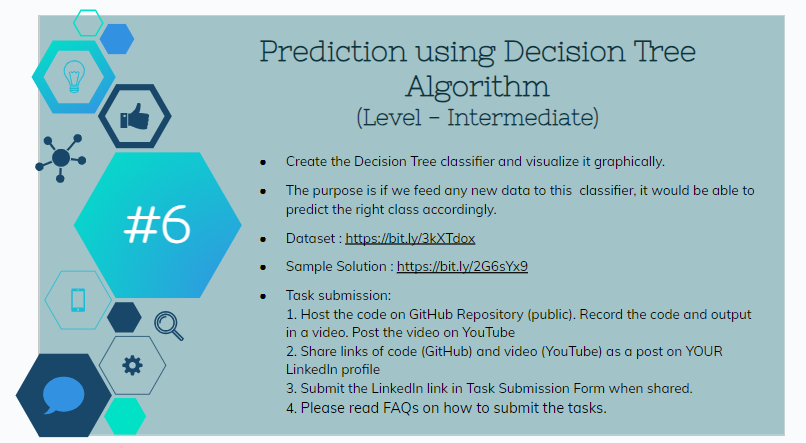

## Problem Statement :

     1.Create the decision tree Classifier and visualize it graphically.
     2.The purpose is if we feed any new data to this classsifer,it would be able to predict the right class accordingly.
    

### Importing Libraries

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt, seaborn as sns

import sklearn.datasets as datasets

%matplotlib inline

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()


In [3]:
# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
df.shape

(150, 4)

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Data visualization

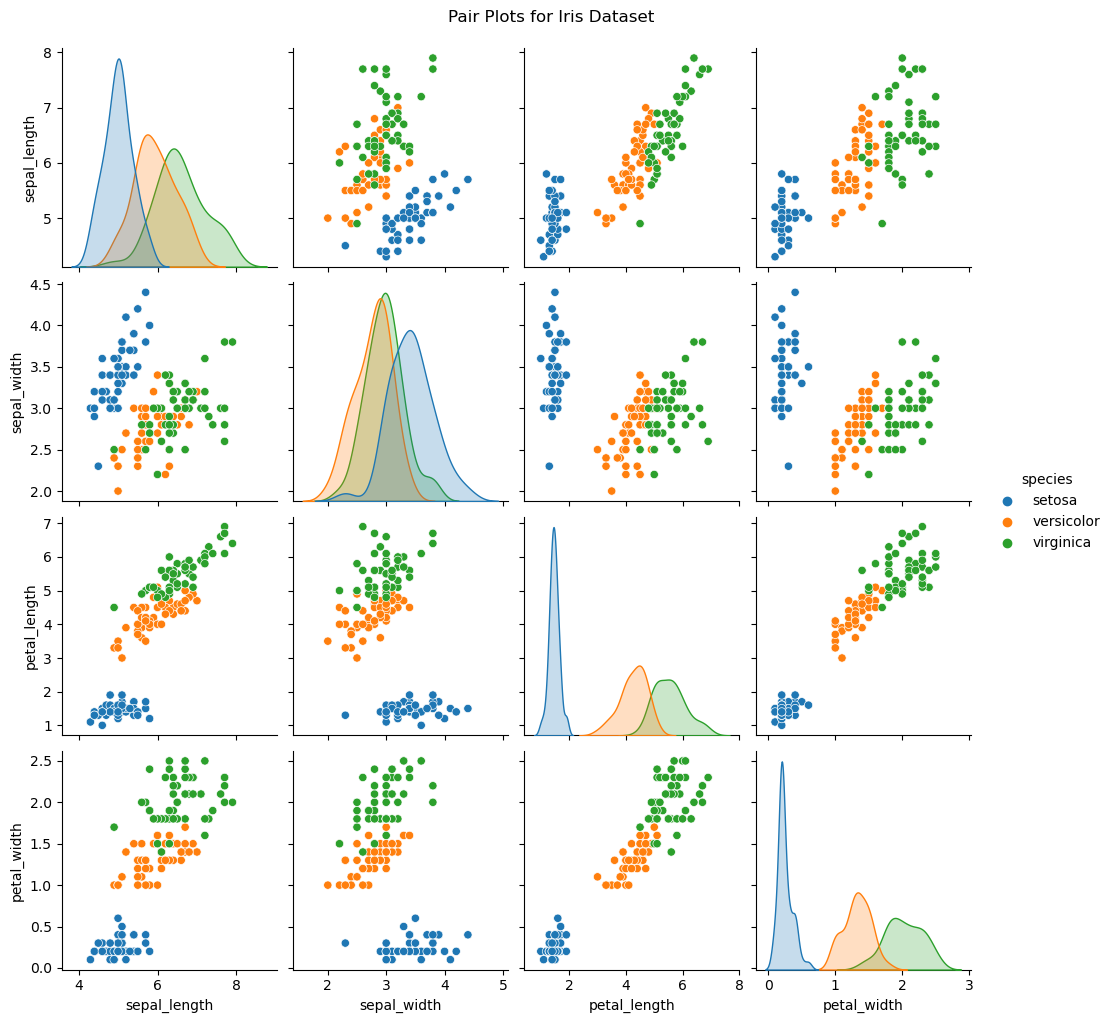

In [7]:
# Visualize pair plots for all features
sns.pairplot(sns.load_dataset("iris"), hue="species", height=2.5)
plt.suptitle("Pair Plots for Iris Dataset", y=1.02)
plt.show()

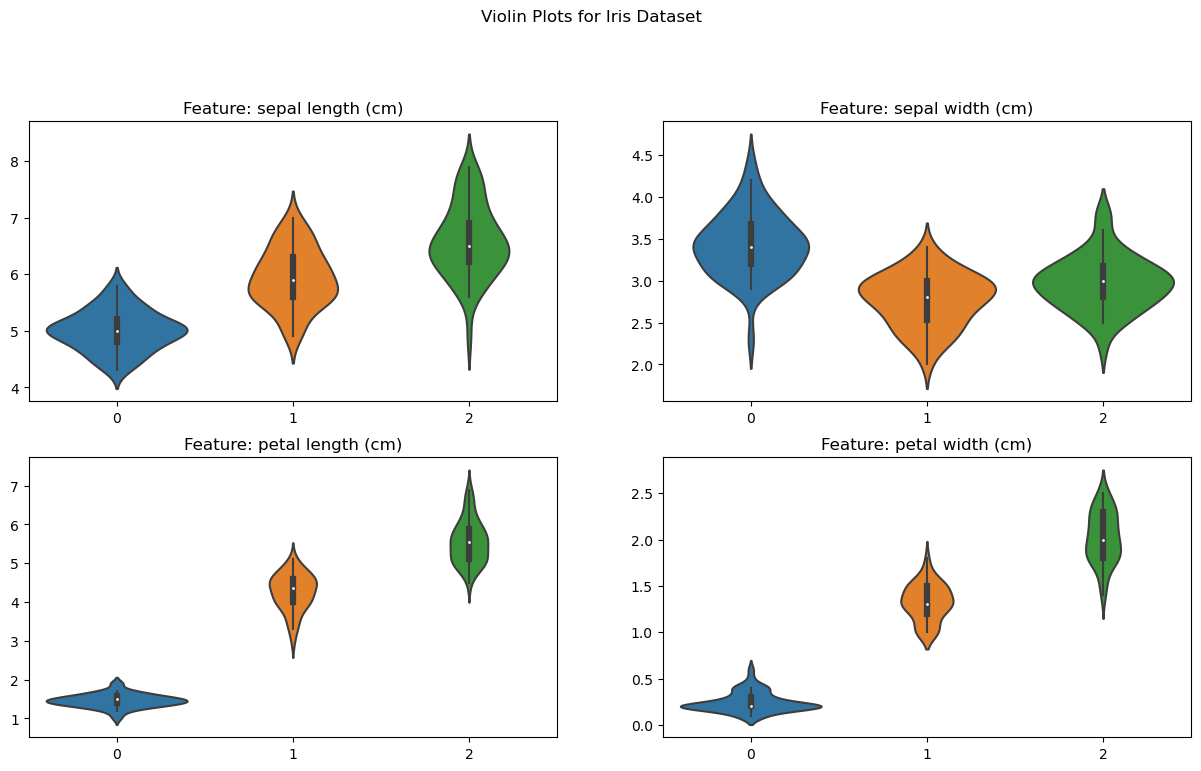

In [8]:
# Visualize violin plots for each feature
plt.figure(figsize=(15, 8))
for i in range(len(iris.feature_names)):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=iris.target, y=iris.data[:, i])
    plt.title(f"Feature: {iris.feature_names[i]}")
plt.suptitle("Violin Plots for Iris Dataset", y=1.02)
plt.show()

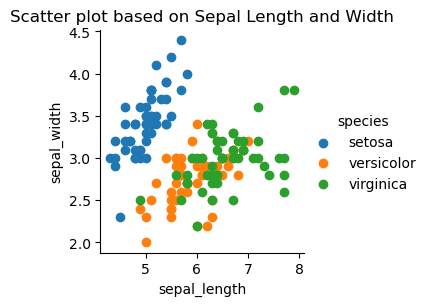

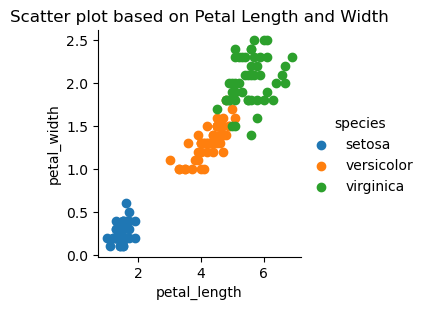

In [9]:
df_iris = sns.load_dataset("iris")
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df_iris, hue="species").map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.title('Scatter plot based on Sepal Length and Width')
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df_iris, hue="species").map(plt.scatter, 'petal_length', 'petal_width').add_legend()
plt.title('Scatter plot based on Petal Length and Width')
plt.show()



## Decision tree algorithm 

In [10]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


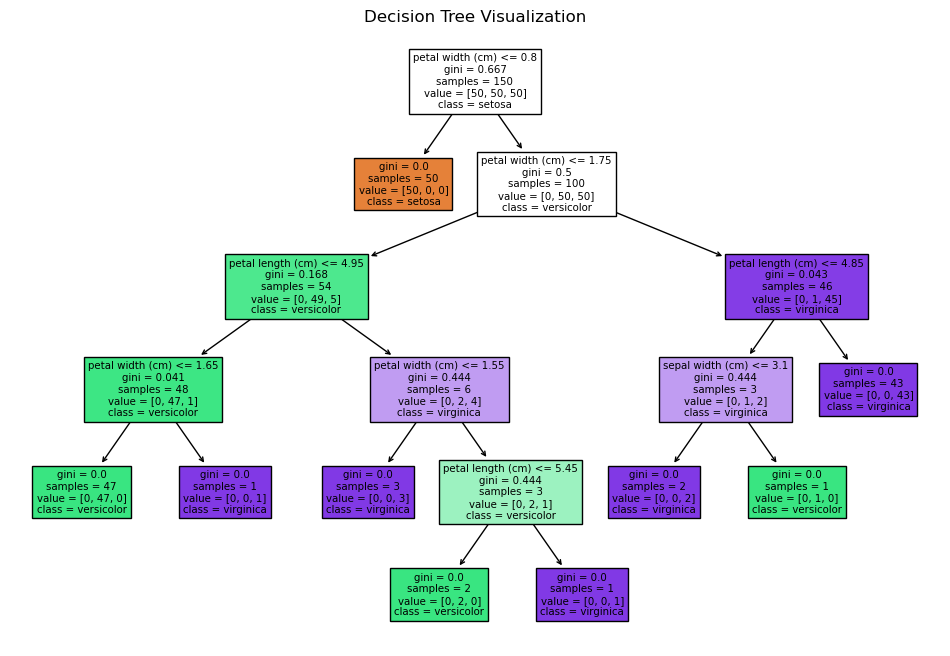

In [11]:
# Plot the decision tree
from sklearn.tree import export_text, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=[str(x) for x in iris.target_names])
plt.title("Decision Tree Visualization")
plt.show()

## Splitting test and train data

In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [13]:
# Train a Decision Tree model
dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

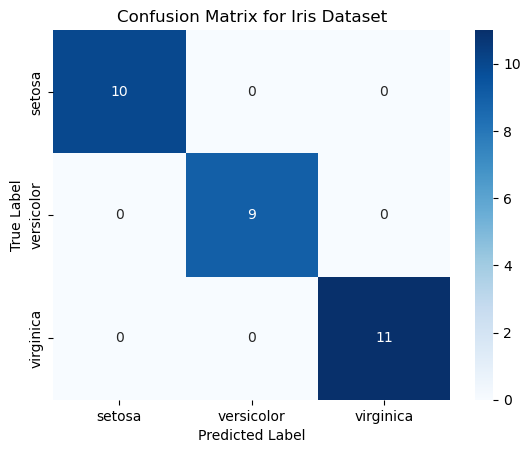

In [15]:
# Visualize confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict on the test set
y_pred = dtree_classifier.predict(X_test)

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix for Iris Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### comparing prediction with test data

In [16]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_predict

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [17]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',dtree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


C:\Users\jayan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Calculating Accuracy of the model


In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## Conclusion
I successfully executed a prediction using the Decision Tree Algorithm and evaluated the model's accuracy score.